In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
data_path = '/content/data_project.csv'
df = pd.read_csv(data_path)

In [5]:
df.head()

,videoId,title,movieName,genres,subtitles,word_count
0,FjzxI6uf8H8,Speak No Evil | Official Trailer,Speak No Evil,"['Drama', 'Horror', 'Thriller']","- This is my husband, Ben.\n- Patrick Feld. Th...",388
1,xy8aJw1vYHo,Joker: Folie à Deux | Official Teaser Trailer,Joker: Folie à Deux,"['Drama', 'Crime', 'Thriller']","[gate opening,\nindistinct chatter] GUARD 1: L...",165
2,y0uS3t6nFgY,MaXXXine | Official Trailer HD | A24,MaXXXine,"['Crime', 'Horror', 'Thriller']","So Maxine, your agent tells us you're\nquite a...",235
3,j6ucGt_Xp14,Dark Matter — Official Trailer | Apple TV+,Dark Matter —,['Documentary'],Jason: Something happened to me. But you would...,338
4,GTNMt84KT0k,Alien: Romulus | Teaser Trailer,Alien: Romulus,"['Science Fiction', 'Horror', 'Thriller']","VOICES\nHelp. Someone help me, please. No, no,...",39


In [6]:
df.describe()

,word_count
count,394.000000
mean,194.002538
std,116.874119
min,0.000000
25%,101.000000
50%,201.000000
75%,278.000000
max,661.000000


In [7]:
df.isnull().sum()

videoId        0
title          0
movieName      0
genres         0
subtitles     27
word_count     0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

videoId       0
title         0
movieName     0
genres        0
subtitles     0
word_count    0
dtype: int64

In [9]:
import ast
df['genres'] = df['genres'].apply(ast.literal_eval)
df_exploded = df.explode('genres')

In [10]:
print(df.shape)
print(df_exploded.shape)

(367, 6)
(944, 6)


In [11]:
df['genres'].apply(lambda x: isinstance(x, list))

0      True
1      True
2      True
3      True
4      True
       ... 
384    True
388    True
389    True
390    True
391    True
Name: genres, Length: 367, dtype: bool

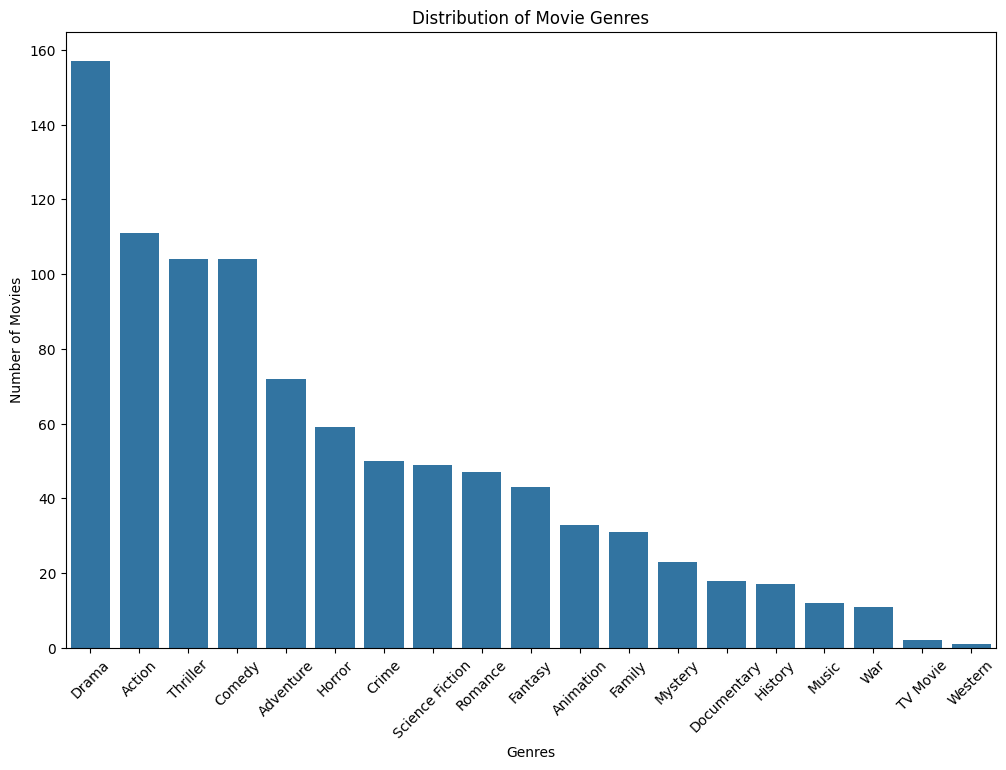

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_exploded is already loaded and the 'genres' column is properly formatted
genre_counts = df_exploded['genres'].value_counts()



plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)  # Rotate the genre labels for better readability if there are many genres
plt.xlabel('Genres')  # Label for the x-axis
plt.ylabel('Number of Movies')  # Label for the y-axis
plt.title('Distribution of Movie Genres')  # Title of the plot
plt.show()



In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and not word in stop_words]
    return ' '.join(tokens)

df_exploded['subtitles'] = df_exploded['subtitles'].apply(preprocess_text)


In [ ]:
df_exploded.head()

,videoId,title,movieName,genres,subtitles,word_count
0,FjzxI6uf8H8,Speak No Evil | Official Trailer,Speak No Evil,Drama,husband ben patrick feld wife kira agnes ant t...,388
0,FjzxI6uf8H8,Speak No Evil | Official Trailer,Speak No Evil,Horror,husband ben patrick feld wife kira agnes ant t...,388
0,FjzxI6uf8H8,Speak No Evil | Official Trailer,Speak No Evil,Thriller,husband ben patrick feld wife kira agnes ant t...,388
1,xy8aJw1vYHo,Joker: Folie à Deux | Official Teaser Trailer,Joker: Folie à Deux,Drama,gate opening indistinct chatter guard let go b...,165
1,xy8aJw1vYHo,Joker: Folie à Deux | Official Teaser Trailer,Joker: Folie à Deux,Crime,gate opening indistinct chatter guard let go b...,165


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer


vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df_exploded['subtitles'])

# Encode genres for multi-label classification
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_exploded['genres'])
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train, y_train)



from sklearn.metrics import accuracy_score, hamming_loss

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Hamming Loss: {hamming}')


Accuracy: 0.005291005291005291
Hamming Loss: 0.24603174603174602
